In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import classification_report, roc_curve, auc

# Открываем все файлы датасета

In [2]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

In [3]:
amsterdam_weekends.head(3)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,1,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137
1,1,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103
2,2,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663


# Смотрим, совпадает ли количество полей в файлах перед их объединением

In [4]:
print(amsterdam_weekdays.shape)
print(amsterdam_weekends.shape)
print(athens_weekdays.shape)
print(athens_weekends.shape)
print(barcelona_weekdays.shape)
print(barcelona_weekends.shape)
print(berlin_weekdays.shape)
print(berlin_weekends.shape)
print(budapest_weekdays.shape)
print(budapest_weekends.shape)

(1103, 20)
(977, 20)
(2653, 20)
(2627, 20)
(1555, 20)
(1278, 20)
(1284, 20)
(1200, 20)
(2074, 20)
(1948, 20)


In [5]:
print(lisbon_weekdays.shape)
print(lisbon_weekends.shape)
print(london_weekdays.shape)
print(london_weekends.shape)
print(paris_weekdays.shape)
print(paris_weekends.shape)
print(rome_weekdays.shape)
print(rome_weekends.shape)
print(vienna_weekdays.shape)
print(vienna_weekends.shape)

(2857, 20)
(2906, 20)
(4614, 20)
(5379, 20)
(3130, 20)
(3558, 20)
(4492, 20)
(4535, 20)
(1738, 20)
(1799, 20)


# Создаём единый датасет

In [6]:
def unite_the_cities(city_p1, column_1, city_p2, column_2, city):

    """Args:
    city_p1 (pandas.DataFrame): первая таблица
    column_1 (str): колонна в первой таблице, содержащая информацию о части недели
    city_p2 (pandas.DataFrame): вторая таблица
    column_2 (str): колонна во второй таблице, содержащая информацию о части недели
    city (str): Название города.

    Returns:
    Единая таблица с информацией о конкретном городе."""

    city_p1['week_part'] = column_1
    city_p2['week_part'] = column_2
    united_tables = pd.concat([city_p1, city_p2])
    united_tables['city'] = city
    return united_tables

amsterdam = unite_the_cities(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = unite_the_cities(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = unite_the_cities(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = unite_the_cities(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = unite_the_cities(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = unite_the_cities(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = unite_the_cities(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = unite_the_cities(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = unite_the_cities(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = unite_the_cities(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

"""Затем города нужно объединить в единую таблицу"""

cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]
city_names = [city.city.unique()[0].capitalize() for city in cities]
all_cities = pd.concat(cities, ignore_index=True)
all_cities.drop(columns = ['Unnamed: 0'], inplace=True)

In [7]:
all_cities.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_part,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


# Смотрим данные о датасете

Разведовательный анализ

In [8]:
all_cities.shape

(51707, 21)

In [9]:
all_cities['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Проверим корреляцию между типом жилья и ценой

Как мы видим, тип особо не влияет на цену

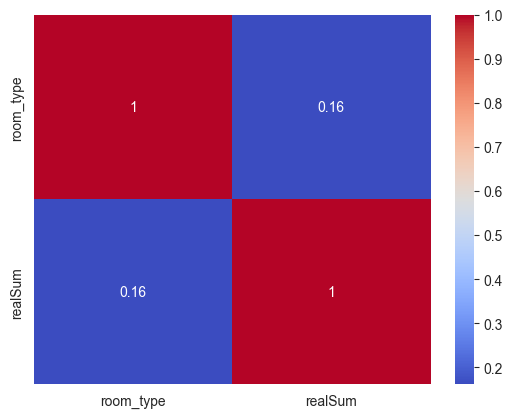

In [10]:
# Приводим строковые значения типов комнат к числам
all_cities['room_type'] = all_cities['room_type'].apply(lambda x: re.sub('\d+', '', x))
all_cities['room_type'] = pd.factorize(all_cities['room_type'])[0]

corr_matrix = all_cities[['room_type', 'realSum']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
all_cities.describe()

,realSum,room_type,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,0.645561,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,0.492923,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,0.000000,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,0.000000,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,1.000000,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,1.000000,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,2.000000,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


# Создаём датасет для анализа средних значений по городам

Группируем данные по городам, вычисляем количество объявлений и количество объявлений с хостом-суперхостом в каждом городе, а затем объединяем эти два набора данных, сортируем их и вычисляет процент объявлений, управляемых суперхостами, от общего числа объявлений в каждом городе

Хост (host) - это владелец жилья или апартаментов, который размещает свое жилье на платформе Airbnb.

Суперхост (superhost) - это хост, который соответствует определенным критериям качества и получает соответствующий статус на платформе, обеспечивая высокий уровень обслуживания для своих гостей. Среди критериев, которые могут повлиять на статус суперхоста, могут быть частота ответов на сообщения гостей, высокий рейтинг и отзывы от гостей, надежность и т.д.

In [12]:
# Вычисляем количество объявлений и количество объявлений с хостом-суперхостом в каждом городе
list_counts = all_cities['city'].value_counts().reset_index().rename(columns={'index': 'city', 'city': 'realSum'})
superhost_count = all_cities.groupby('city')['host_is_superhost'].sum().reset_index()


# Объединяем два набора данных, сортируем их и вычисляем процент объявлений, управляемых суперхостами, от общего числа объявлений в каждом городе
list_superhost_count = pd.merge(list_counts, superhost_count).sort_values('realSum', ascending=False)
list_superhost_count['perc'] = list_superhost_count.apply(lambda row:
                                                                round((row['host_is_superhost'] / row['realSum'] * 100), 1), axis=1)
list_superhost_count['perc'] = list_superhost_count.perc.apply(lambda x: str(x) + "%")


# Вычисляем средние значения cleanliness_rating, guests_satisfaction_overall и bedrooms для каждого города
city_stats = all_cities.groupby('city').agg({'cleanliness_rating': 'mean', 'guest_satisfaction_overall': 'mean', 'bedrooms': 'mean'}).reset_index()

# Объединяем новые данные с существующей таблицей
list_superhost_count = pd.merge(list_superhost_count, city_stats, on='city')
list_superhost_count

,city,realSum,host_is_superhost,perc,cleanliness_rating,guest_satisfaction_overall,bedrooms
0,london,9993,1573,15.7%,9.175023,90.645652,1.128790
1,rome,9027,2949,32.7%,9.514678,93.122300,1.229755
2,paris,6688,941,14.1%,9.263606,92.037530,0.972787
3,lisbon,5763,1233,21.4%,9.370640,91.093875,1.272428
4,athens,5280,2263,42.9%,9.638447,95.003598,1.271402
5,budapest,4022,1524,37.9%,9.477374,94.585281,1.105669
6,vienna,3537,1005,28.4%,9.472434,93.731128,1.102347
7,barcelona,2833,514,18.1%,9.291564,91.109072,1.161313
8,berlin,2484,639,25.7%,9.461755,94.323671,1.070451
9,amsterdam,2080,591,28.4%,9.465865,94.514423,1.292308


# Визуализация

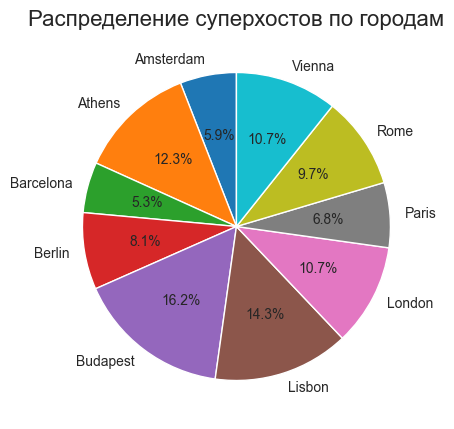

In [13]:
list_superhost_count['perc'] = list_superhost_count['perc'].apply(lambda x: float(x[:-1]))

perc_values = list(list_superhost_count['perc'])
cities = list(list_superhost_count['city'])
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(perc_values, labels=city_names, autopct='%1.1f%%', startangle=90)
plt.title('Распределение суперхостов по городам', fontsize=16)
plt.show()

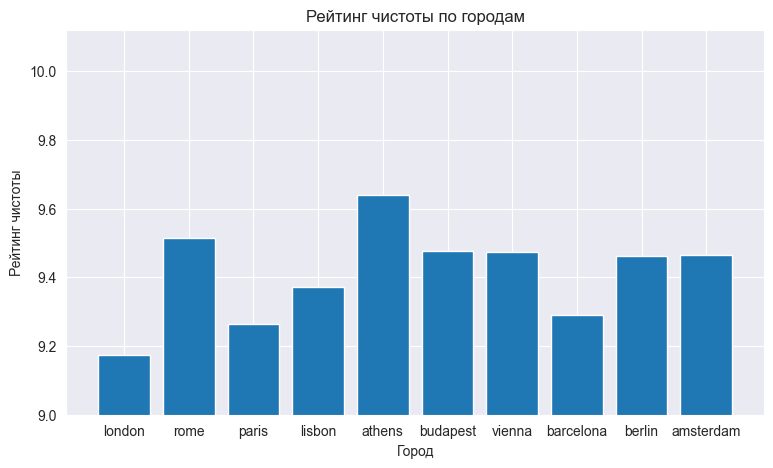

In [14]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(list_superhost_count['city'], list_superhost_count['cleanliness_rating'])
ax.set_ylim(bottom=9)
ax.set_xlabel('Город')
ax.set_ylabel('Рейтинг чистоты')
ax.set_title('Рейтинг чистоты по городам')
plt.show()

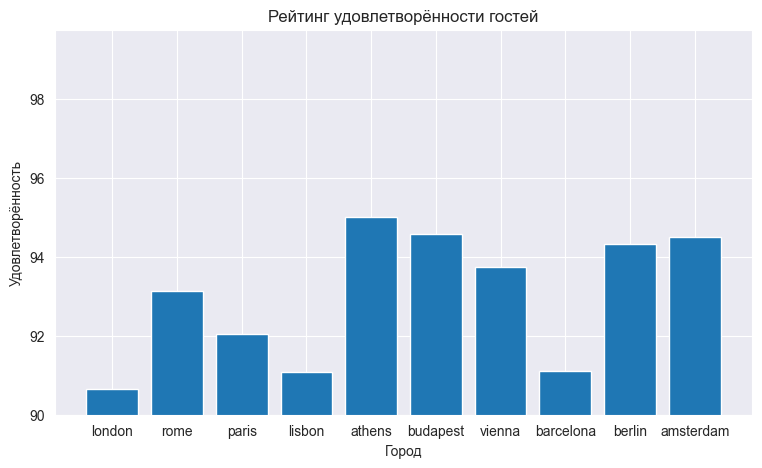

In [15]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(list_superhost_count['city'], list_superhost_count['guest_satisfaction_overall'])
ax.set_ylim(bottom=90)
ax.set_xlabel('Город')
ax.set_ylabel('Удовлетворённость')
ax.set_title('Рейтинг удовлетворённости гостей')
plt.show()

# Корреляция между чистотой жилья и удовлетворённостью гостей

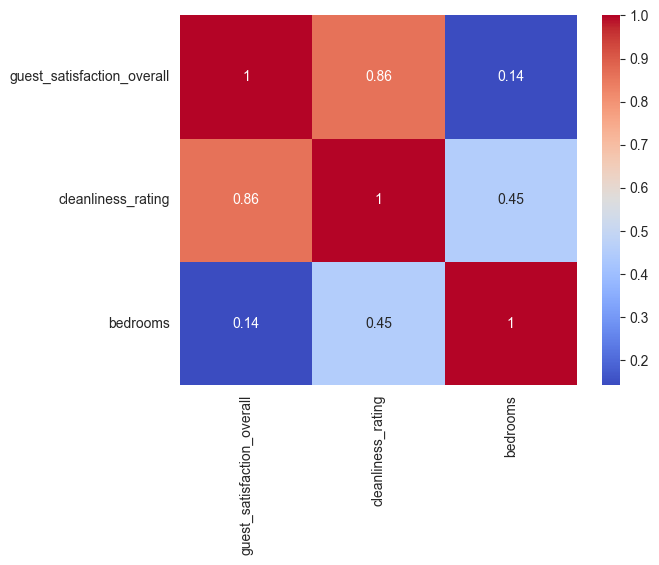

In [16]:
# создаем матрицу корреляции
corr_matrix = list_superhost_count[['guest_satisfaction_overall', 'cleanliness_rating', 'bedrooms']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Выводы на основе визуализации:

1) Чистота жилья напрямую влияет на удовлетворённость гостей
2) Количество спален не влияют на удовлетворённость гостей, однако значительное влияние оказывает на чистоту помещения
3) Самыми непопулярными городами являются Лондон, Париж, Лиссабон и Барселона – они же самые загрязнённым в плане жилья

Параметры 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms' мы можем использовать для построения логистической регрессии, чтобы выяснить, будет ли являться арендодатель суперхостом

Ключевой метрикой мы возьмём Accuracy

# Строим модель логистической регрессии на исходном датасете

In [17]:
# определяем признаки переменной
X = all_cities[['cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms']]
y = all_cities['host_is_superhost']

# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# оценка точности модели на тестовой выборке
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7412492748017792


На основе Accuracy можно сделать вывод, что модель достаточно хорошо обобщает данные и способна предсказывать целевую переменную на новых данных с высокой точностью

# Построение Roc-кривой

(Area Under the Receiver Operating Characteristic Curve)

Precision, Recall, F1-score – эти метрики помогут проанализировать качество модели на более глубоком уровне и определить, какие аспекты модели можно улучшить для достижения лучшей производительности.

Precision (точность) - это метрика, которая показывает, как много из предсказанных моделью объектов относятся к положительному классу и являются правильно классифицированными.

Recall (полнота) - это метрика, которая показывает, как много из всех объектов положительного класса модель классифицировала правильно.

F1-score - это гармоническое среднее точности и полноты.

In [18]:
# получаем предсказанные значения для тестовой выборки
y_pred = model.predict(X_test)

# выводим classification report
print(classification_report(y_test, y_pred))

# строим ROC-кривую и вычисляем площади под ней (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC: {roc_auc}")

              precision    recall  f1-score   support

       False       0.74      1.00      0.85      7666
        True       0.00      0.00      0.00      2676

    accuracy                           0.74     10342
   macro avg       0.37      0.50      0.43     10342
weighted avg       0.55      0.74      0.63     10342

AUC-ROC: 0.5


/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precisi

# Выводы:

Несмотря на хорошее значение Accuracy, значение AUC-ROC составляет 0.5 при тестовых выборках 20%, 40%, 60% и 0.49 при выборках 10%, 30%, 50%. Это значит, что модель угадывает значение и нуждается в доработке


# Доработка

Для доработки мы возьмём большее количество метрик, изучим корреляцию между ними и заново обучим модель

Метрики: удовлетворённость гостей, чистота, кол-во спален, вместимость, расстояние до центра, расстояние до метро, привлекательность, комфорт, арендодатель является суперхостом

Для начала, преобразуем поле 'host_is_superhost' в тип int для его числовой бинаризации

In [19]:
all_cities['host_is_superhost'] = all_cities['host_is_superhost'].astype(int)
all_cities.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_part,city
0,194.033698,0,False,True,2.0,0,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,0,False,True,4.0,0,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,0,False,True,2.0,0,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,0,False,True,4.0,0,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,0,False,True,2.0,1,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam


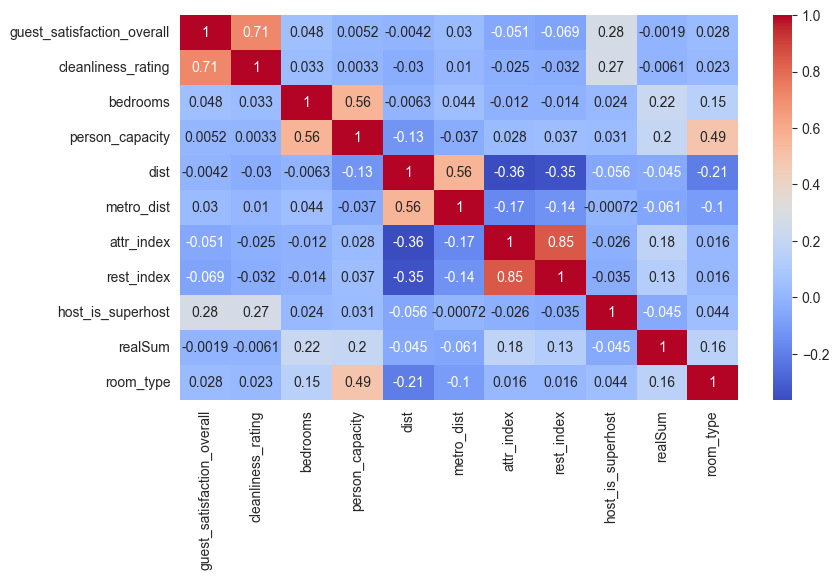

In [20]:
corr_matrix = all_cities[['guest_satisfaction_overall', 'cleanliness_rating', 'bedrooms', 'person_capacity', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'host_is_superhost', 'realSum', 'room_type']].corr()
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0)
plt.show()

Как мы видим, наибольшее влияние на удовлетворённость гостей оказывают чистота (как выяснилось ранее), количество спален, вместимость, расстояние до центра, привлекательность(во многом определяется комфортом) и комфорт

# Повторная модель логистической регрессии на основе новых данных

In [21]:
# определяем признаки переменной
X = all_cities[['cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'person_capacity', 'dist', 'attr_index', 'rest_index', 'realSum']]
y = all_cities['host_is_superhost']

# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# оценка точности модели на тестовой выборке
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7395087990717463


/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# получаем предсказанные значения для тестовой выборки
y_pred = model.predict(X_test)

# выводим classification report
print(classification_report(y_test, y_pred))

# строим ROC-кривую и вычисляем площади под ней (AUC-ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      7666
           1       0.48      0.08      0.13      2676

    accuracy                           0.74     10342
   macro avg       0.61      0.52      0.49     10342
weighted avg       0.68      0.74      0.66     10342

AUC-ROC: 0.523393826018016


# Проверим модель на переобучаемость

train_sizes=np.linspace(0.1, 1.0, 10): Этот параметр задает долю обучающих данных, используемых для каждого раунда кросс-валидации. Здесь мы используем 10 значений, начиная от 0,1 и заканчивая 1,0, чтобы провести кросс-валидацию на 10 разных размерах обучающих выборок.

cv=5: Этот параметр задает количество разбиений (фолдов) в кросс-валидации. Здесь мы используем 5 фолдов, что означает, что данные разбиваются на 5 частей, и каждая часть последовательно используется как тестовый набор данных, а оставшиеся части используются для обучения модели.

scoring='accuracy': Этот параметр задает метрику оценки качества модели. Здесь мы используем метрику точности (accuracy), которая показывает долю правильных предсказаний модели.

/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

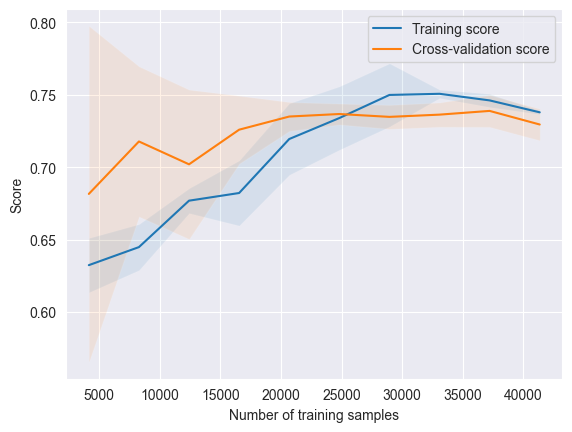

In [23]:
# определяем размер обучающей выборки, по которой будет строиться кривая обучения
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# определяем средние значения и стандартные отклонения для тренировочных и тестовых результатов
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# строим график
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# добавляем стандартные отклонения
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# добавляем подписи и легенду
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend()

plt.show()

# Пишем функцию для предсказания того, будет ли арендодатель суперхостом

In [24]:
def predict(cleanliness_rating, guest_satisfaction_overall, bedrooms, person_capacity, dist, attr_index, rest_index, realSum):
    # создаем массив признаков для предсказания
    features = np.array([cleanliness_rating, guest_satisfaction_overall, bedrooms, person_capacity, dist, attr_index, rest_index, realSum]).reshape(1,-1)
    # делаем предсказание
    prediction = model.predict(features)
    return prediction[0]

In [25]:
predict(8.9, 85.3, 1, 3, 4.23, 100.5, 156.4, 344.245776)

/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [26]:
predict(10.0, 99.9, 2, 4, 1.23, 499.5, 456.4, 244.245776)

/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [27]:
predict(9.9, 99.3, 2, 4, 4.23, 299.5, 456.4, 344.245776)

/Users/kirillkasickij/Library/Application Support/JetBrains/DataSpell2022.2/projects/workspace/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0